# Max Open Loss Percent 90 Days

Not used in C2score.

In [1]:
source("JupyterUtils.R")
source("C2ScoreHypothesisPresentation.R")

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1878      198141      0.0000      3.3500      7.7600     43.5879     19.5200       1e+05    981.9965 


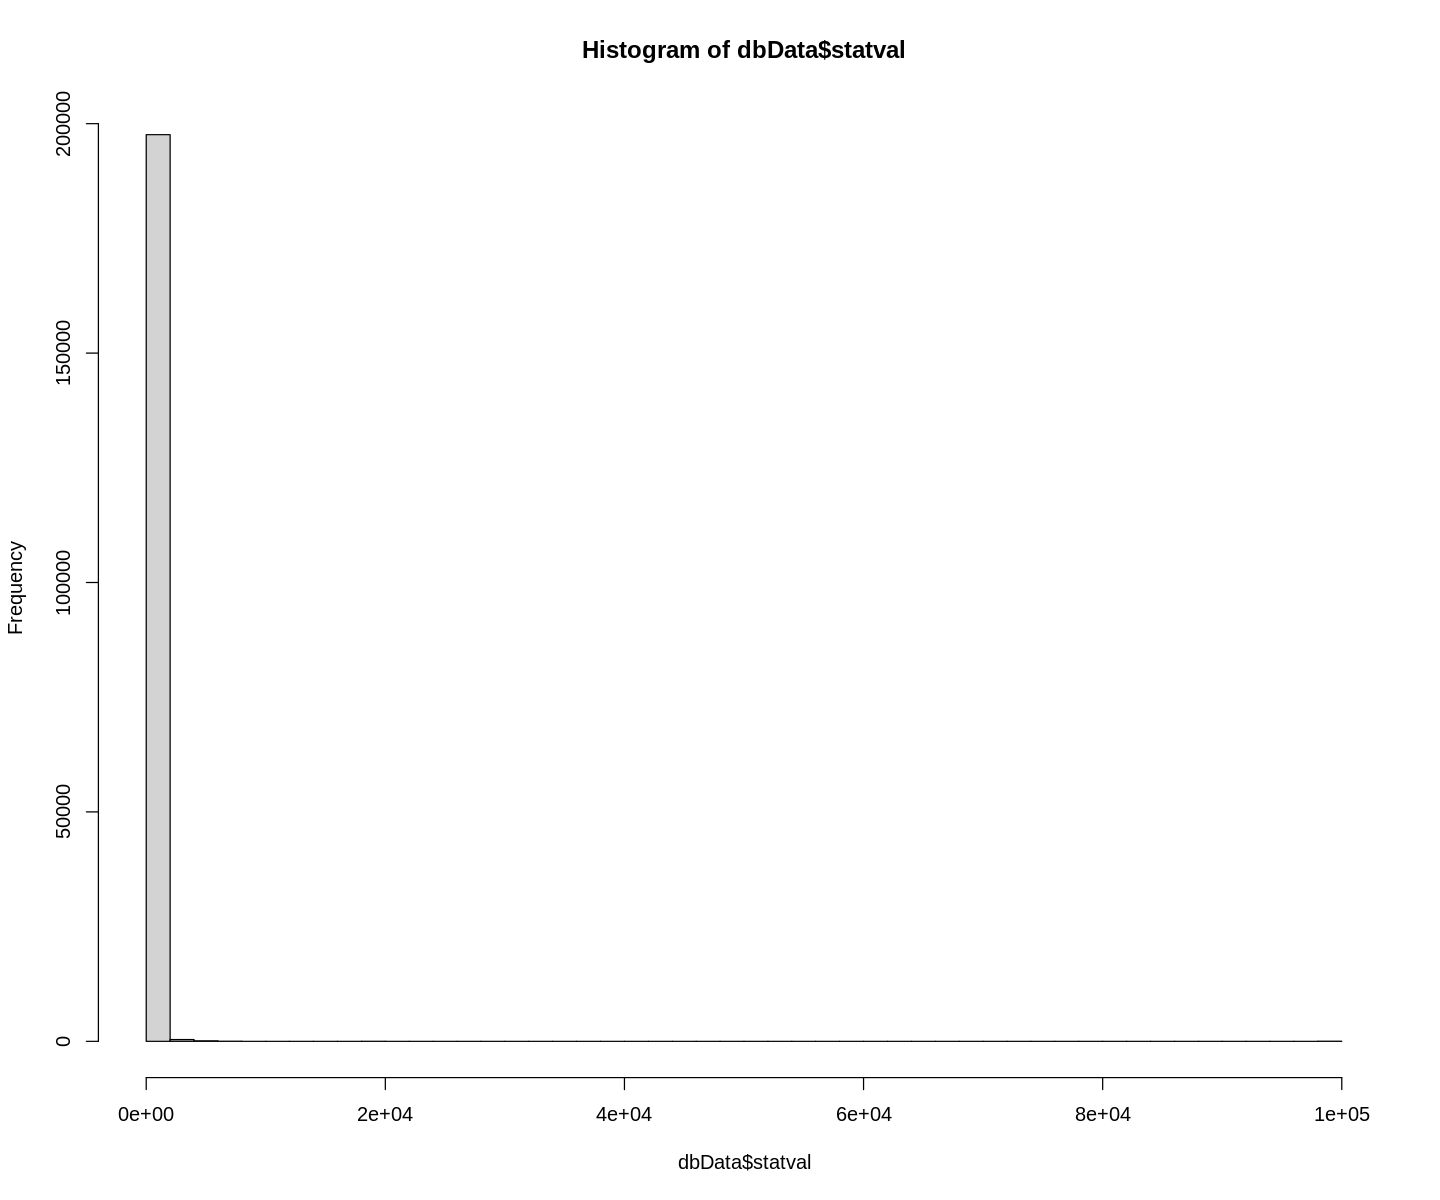

In [2]:
# What data we have.
dbData = getC2ScoreDbData("select systemid, DateStart, maxworstLossPercentEquity090 as statval from maxOpenLossDailyView")
overview(dbData)
hist(dbData$statval,breaks=50)

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1833      136161      0.0000      2.4000      4.7100      5.6299      8.2200     15.0000      3.9293 


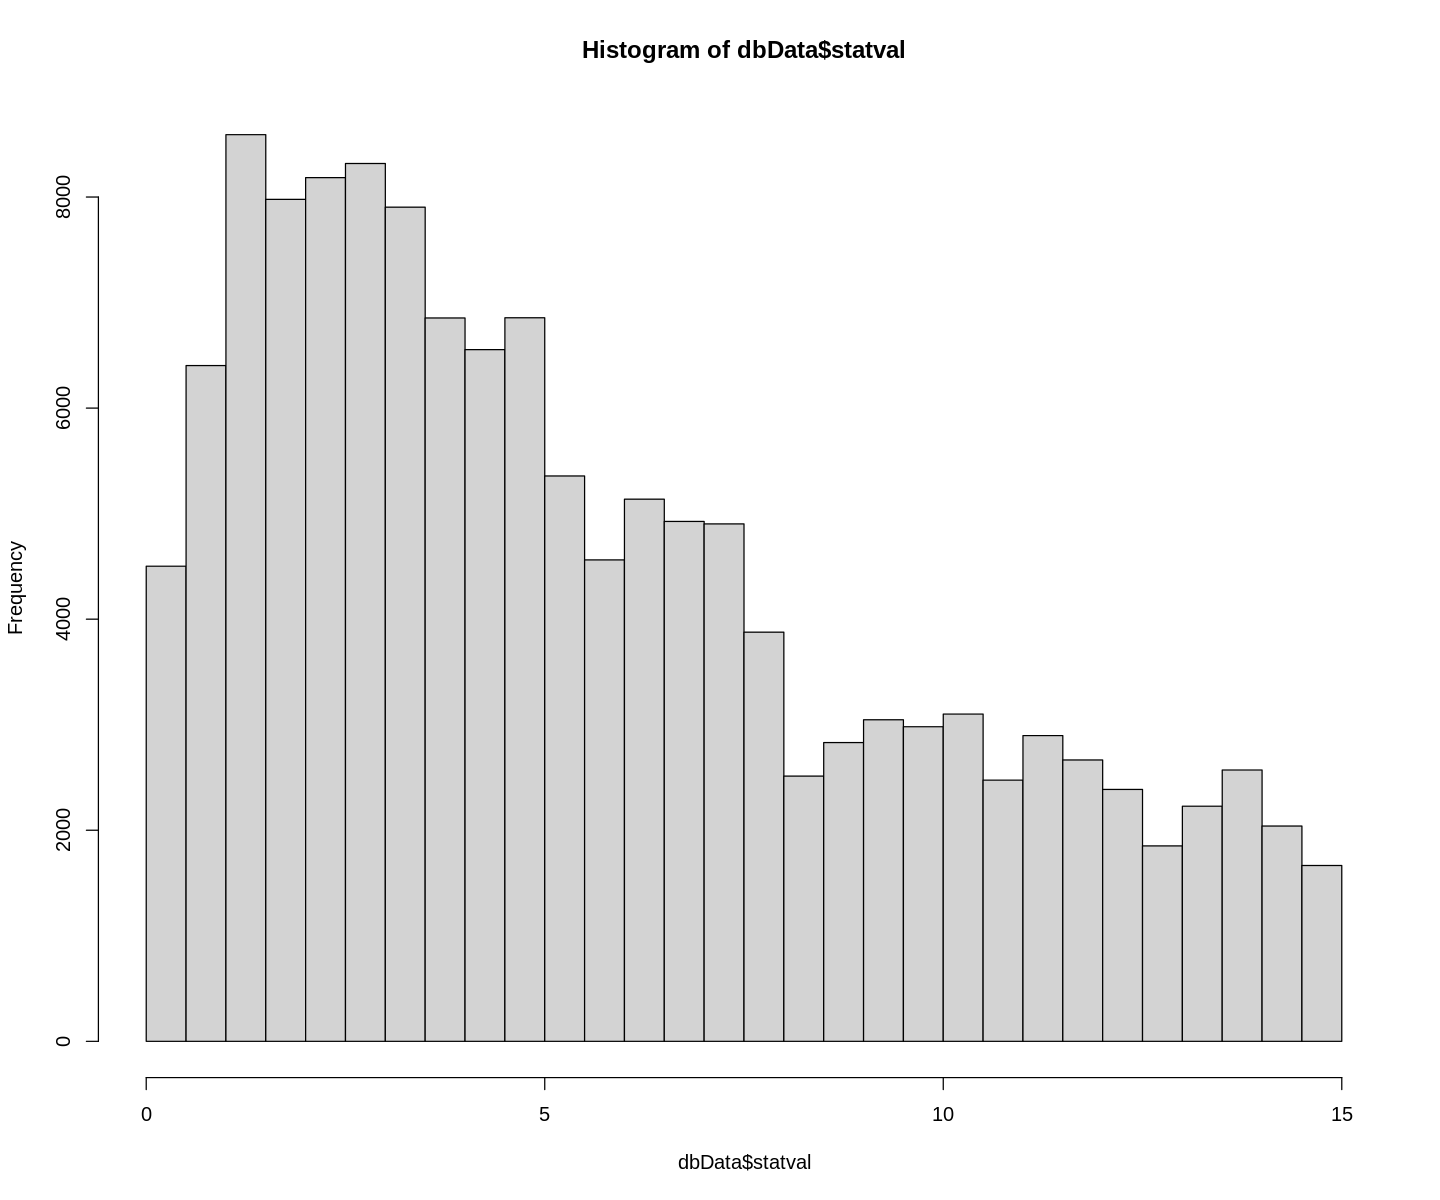

In [3]:
# Let's get 0% - 15% 

sql = "select systemid, DateStart, maxworstLossPercentEquity090 as statval, m.*
       from maxOpenLossDailyView m
       where maxworstLossPercentEquity090 >= 0 and maxworstLossPercentEquity090 <= 15"

dbData = getC2ScoreDbData(sql)
overview(dbData)
hist(dbData$statval,breaks=50)



We have calculated and stored the whole population statistics of strategies daily returns after 7, 14, ..., 360 days. Day after day. Now, we selected a particular statistics data (a sample) from the whole population. We want to know, if the average of returns of the sample is significantly higher than an average of returns of the whole population. A significance level is  0.05 .

The following table contains this hypothesis tests for defined stats intervals and all 7, 14, ..., 360 days time intervals.


Descriptive stats of all data selected in the experiment:
     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1833      136161      0.0000      2.4000      4.7100      5.6299      8.2200     15.0000      3.9293 



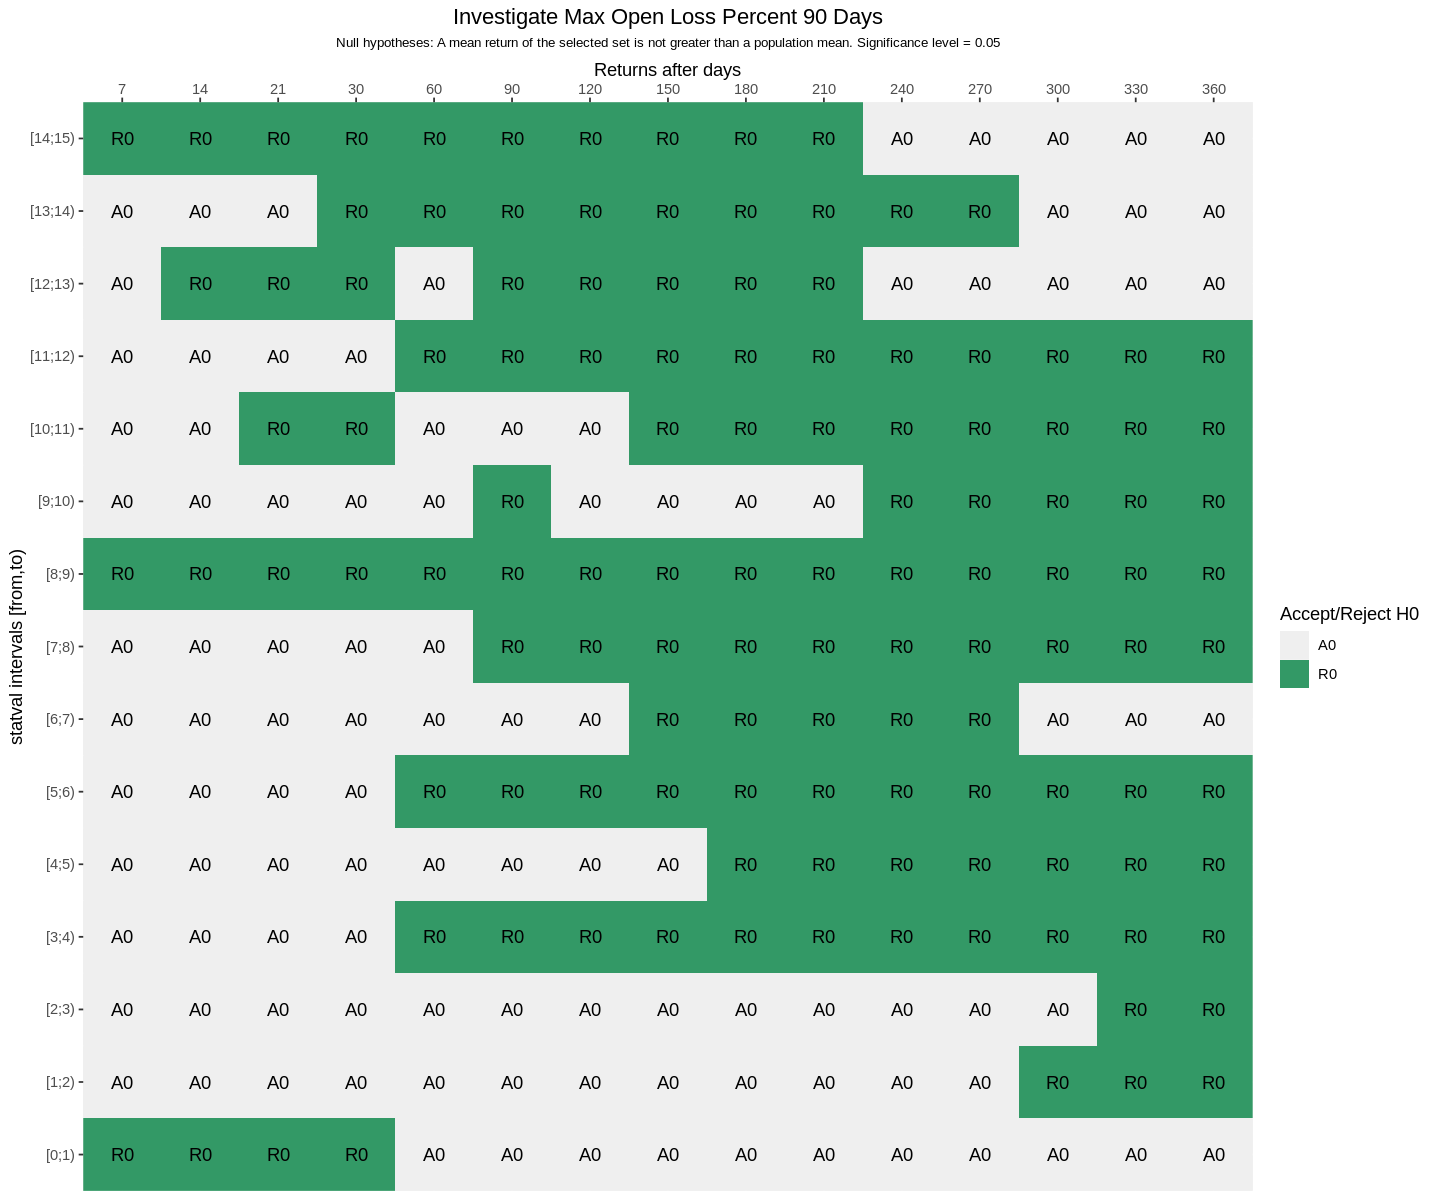

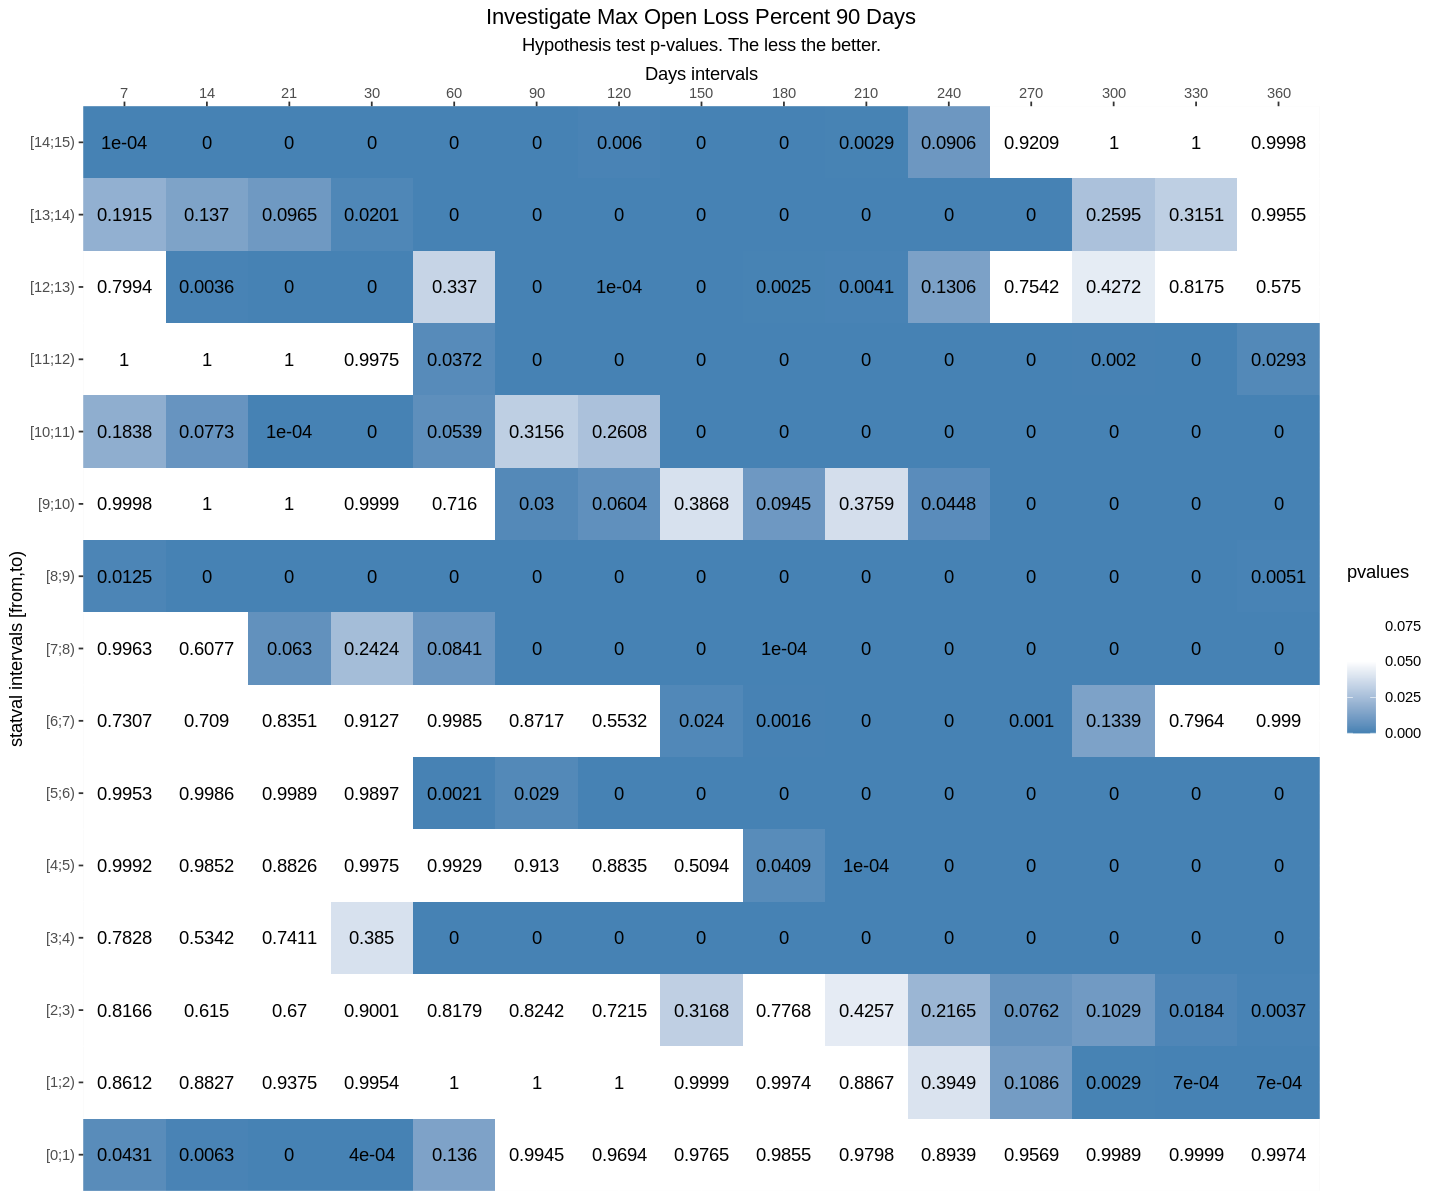

In [4]:
experiment = list(
  name = "maxworstLossPercentEquity090",
  description = "Investigate Max Open Loss Percent 90 Days",
  sqlText = sql, # the latest sql above
  attributeName = "statval",
  attributeSteps = seq(from = 0, to = 15, by = 1))

result = makeExperiment(experiment)


Hypothesis test of sample standard deviation.

Alternative hypothesis: The sample standard deviation is less than the population SD.


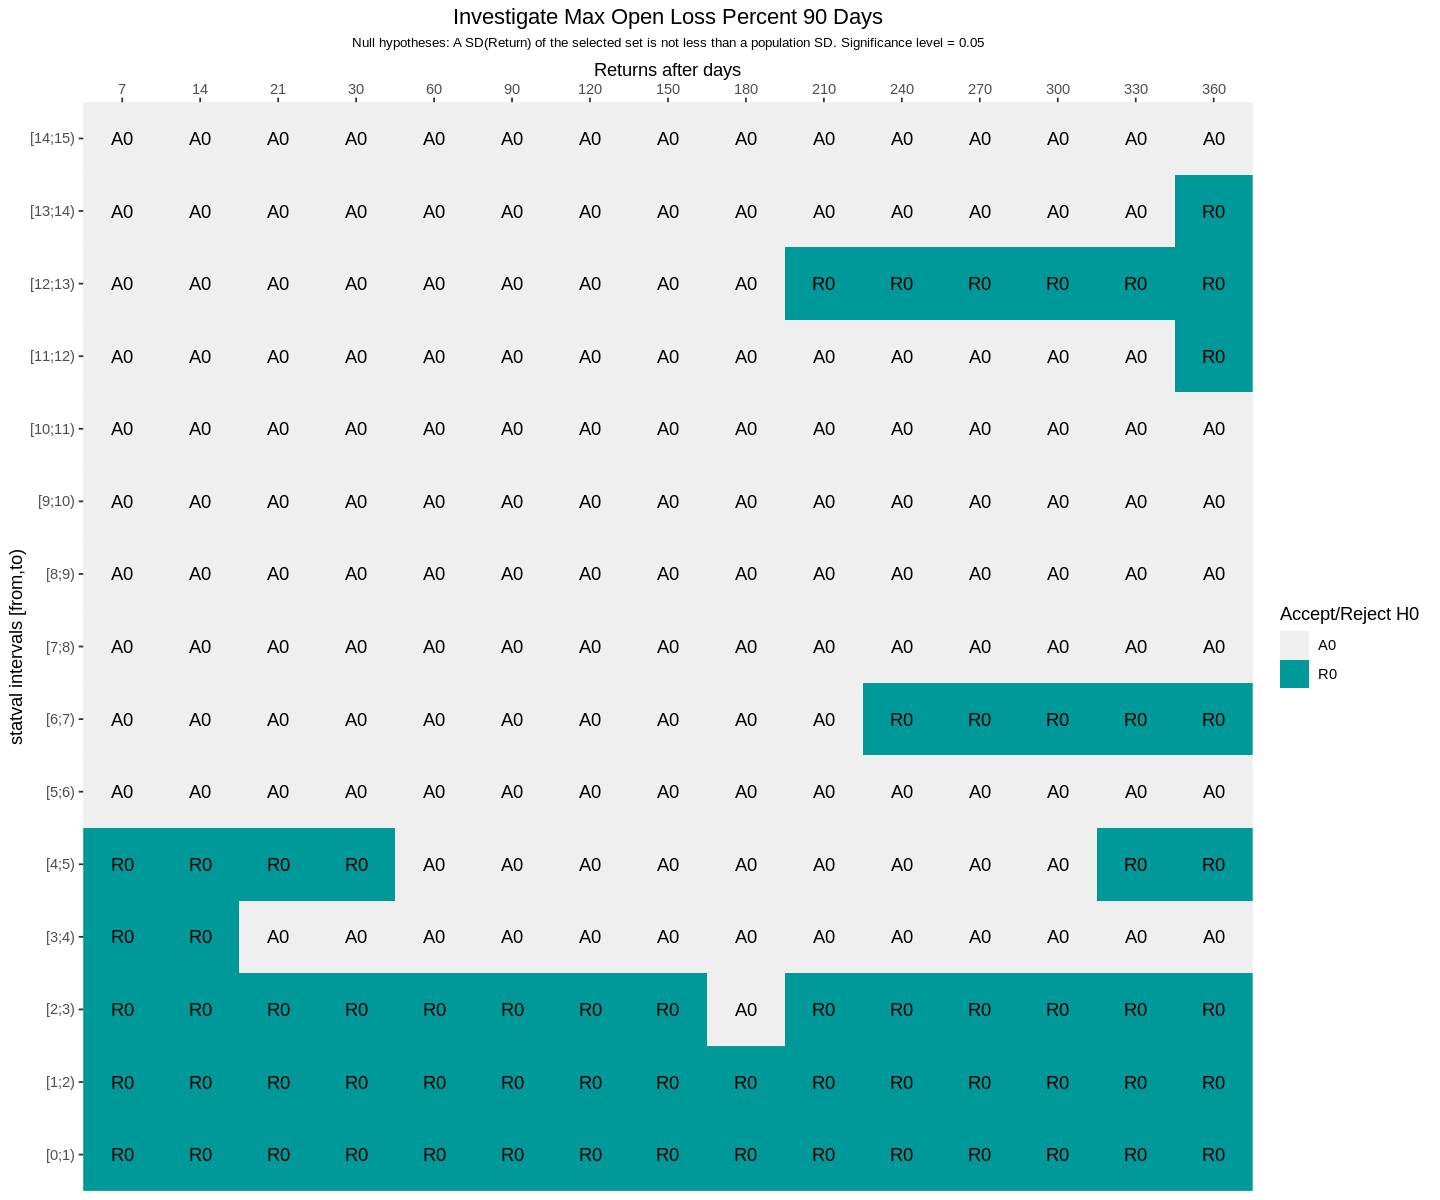

In [5]:
showSDLessHypothesisTest(experiment, result)

In [6]:
showObservationsCounts(experiment, result)


The following table contains numbers of observations in the used statistics intervals.
A number of observations in the sample is an important part of the hypothesis testing. Be careful if it is low (less than 30).
Numbers of observations shown in this table are NOT numbers of C2 strategies! Every strategy can have many observations in any statistics interval. That is what is shown here.


Selection,Obs007,Obs014,Obs021,Obs030,Obs060,Obs090,Obs120,Obs150,Obs180,Obs210,Obs240,Obs270,Obs300,Obs330,Obs360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14 <= statval < 15,3688,3586,3477,3316,2731,2256,1888,1622,1454,1292,1158,1055,936,851,761
13 <= statval < 14,4646,4469,4296,4087,3490,2977,2562,2274,2016,1769,1552,1384,1252,1160,1090
12 <= statval < 13,4085,3932,3825,3699,3114,2629,2224,2017,1812,1599,1405,1225,1113,1053,1016
11 <= statval < 12,5438,5281,5115,4907,4240,3555,2949,2599,2370,2043,1691,1438,1255,1071,896
10 <= statval < 11,5332,5171,4989,4754,4069,3509,3029,2657,2246,1894,1662,1566,1342,1178,961
9 <= statval < 10,5895,5699,5492,5249,4520,3809,3190,2676,2323,1988,1721,1480,1364,1265,1189
8 <= statval < 9,5154,5007,4850,4645,4107,3558,3028,2608,2262,1983,1732,1574,1437,1343,1190
7 <= statval < 8,8492,8221,7980,7701,6591,5756,4969,4267,3892,3500,3060,2627,2302,2028,1827
6 <= statval < 7,9833,9607,9334,8979,8078,7217,6323,5588,5014,4516,4055,3621,3202,2961,2722



SampleMetricValue minus PopulationMetricValue

This table shows differences between metric values calculated for the whole population and the current sample metric values. (See the chapter 'Population statistics'.)
This is different from our hypothesis test. Our hypothesis test tests an (alternative) hypothesis 'Is a mean of the sample greater than a mean of the population?'
But our metric is 'Mean divided by SD'. So the standard deviation plays a role in it.
Our metric is greater when a numerator is greater and/or denominator is less. It is up to you what you prefer.



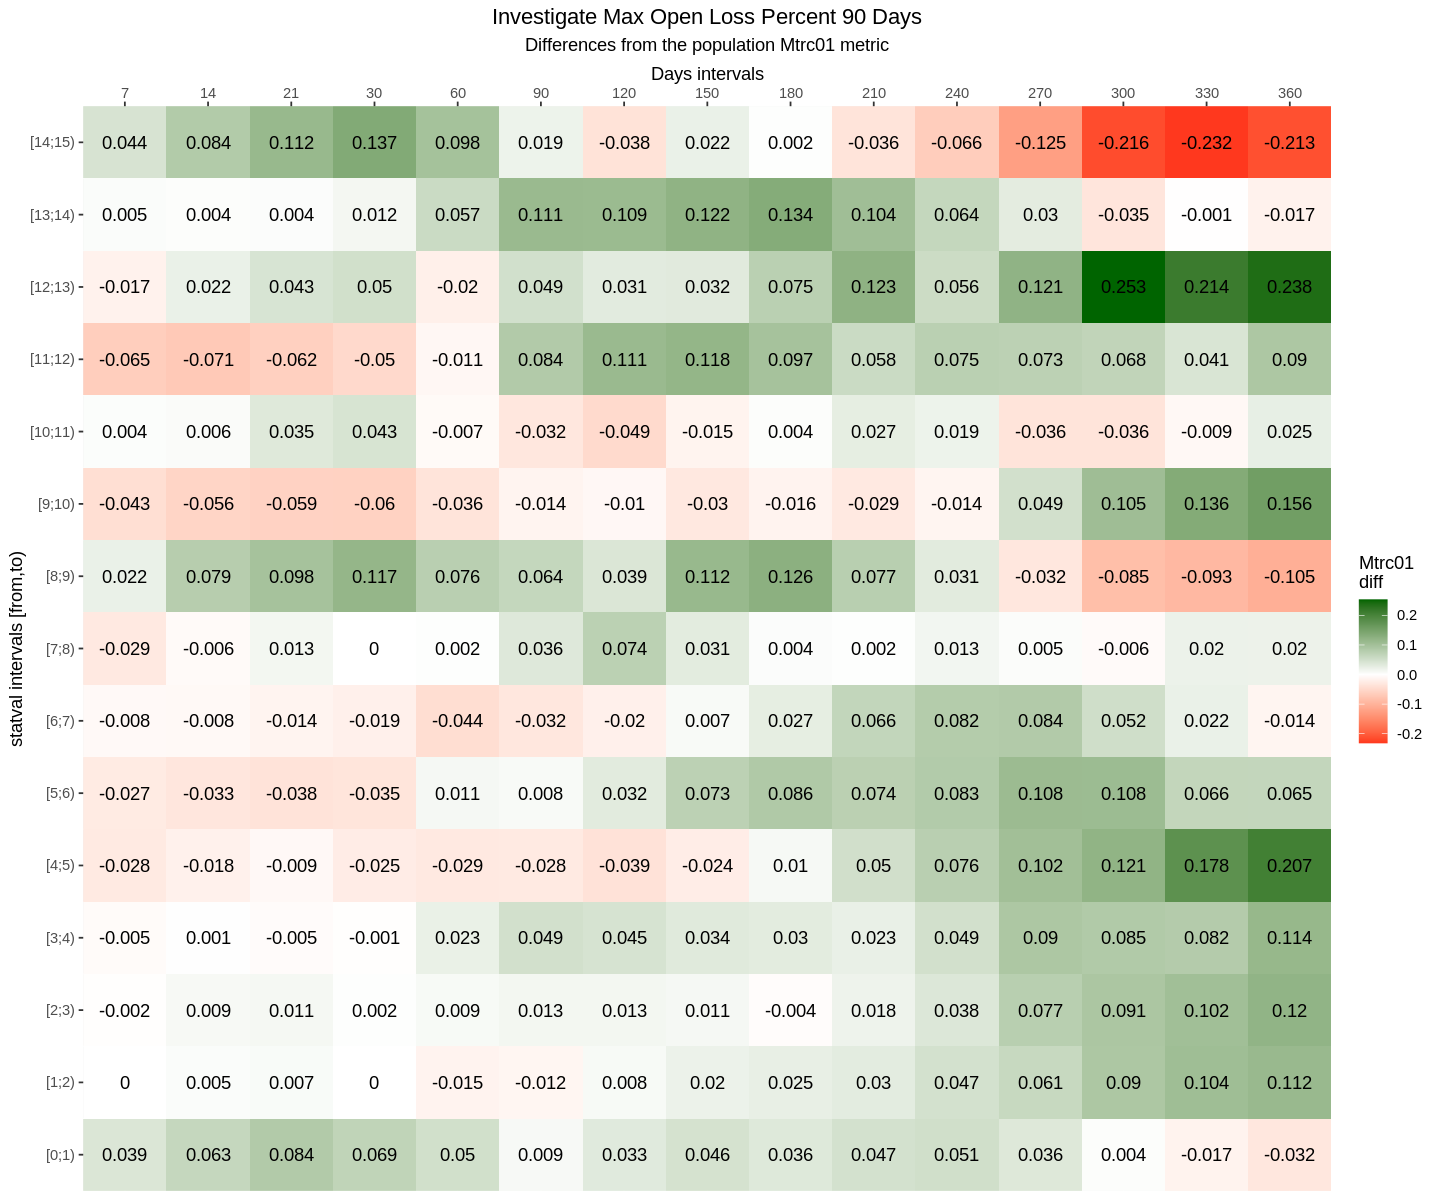

In [7]:
showMetricDifferences(experiment, result)

In [8]:
showSystemsCounts(experiment, result)



Numbers of strategies observed in defined intervals.

Selection,Sys007,Sys014,Sys021,Sys030,Sys060,Sys090,Sys120,Sys150,Sys180,Sys210,Sys240,Sys270,Sys300,Sys330,Sys360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14 <= statval < 15,233,225,220,215,182,156,130,107,94,84,68,61,51,45,43
13 <= statval < 14,269,261,254,242,200,169,144,120,102,94,84,78,67,57,50
12 <= statval < 13,285,267,253,242,213,178,145,125,108,91,78,66,55,49,43
11 <= statval < 12,315,301,293,281,243,213,176,150,134,119,104,87,78,65,55
10 <= statval < 11,326,314,305,295,258,210,176,151,135,117,99,92,75,71,66
9 <= statval < 10,382,367,354,337,284,251,208,174,156,133,118,106,88,80,71
8 <= statval < 9,389,380,372,354,311,273,229,196,173,157,133,117,101,91,80
7 <= statval < 8,480,465,442,432,375,320,273,225,192,175,158,134,112,101,88
6 <= statval < 7,520,513,505,485,430,383,320,268,233,210,183,159,136,124,111


### Discussion
 
.............................